In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
# Changing all the directors with null values to be Unknown
df['director'] = df['director'].fillna('Unknown')

# Splitting the Date column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year.fillna(df['release_year'])
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['year_added'].fillna(0).astype(int)
df = df[df['year_added'] >= 2005]

# Splitting the duration column so we can differentiate a Movie from a Tv Show
def convert_duration(x):
    if "min" in x:
        return int(x.replace(" min",""))
    elif "Season" in x:
        return int(x.split()[0])
    return None
df['duration_num'] = df['duration'].apply(convert_duration)
df['duration_min'] = df.apply(lambda x: x['duration_num'] if x['type']=="Movie" else None, axis=1)
df['duration_seasons'] = df.apply(lambda x: x['duration_num'] if x['type']=="TV Show" else None, axis=1)

# Duplicating the rows that have more than 1 country in it and splitting the countries
df['country'] = df['country'].fillna('Unknown')
df = df.assign(country=df['country'].str.split(',\s*')).explode('country')
df['country'] = df['country'].str.strip()

# The same here for the Listed in column
df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Usless columns
df = df.drop(columns=['show_id', 'cast', 'description'])


df = df.reset_index(drop=True)
df.head()

<>:24: SyntaxWarning:

invalid escape sequence '\s'

<>:24: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipython-input-3258038086.py:24: SyntaxWarning:

invalid escape sequence '\s'



,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,duration_num,duration_min,duration_seasons
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,2019-09-09,2019,TV-PG,90 min,Children & Family Movies,2019,9.0,90,90.0,NaN
1,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,2019-09-09,2019,TV-PG,90 min,Comedies,2019,9.0,90,90.0,NaN
2,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",India,2019-09-09,2019,TV-PG,90 min,Children & Family Movies,2019,9.0,90,90.0,NaN
3,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",India,2019-09-09,2019,TV-PG,90 min,Comedies,2019,9.0,90,90.0,NaN
4,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",South Korea,2019-09-09,2019,TV-PG,90 min,Children & Family Movies,2019,9.0,90,90.0,NaN


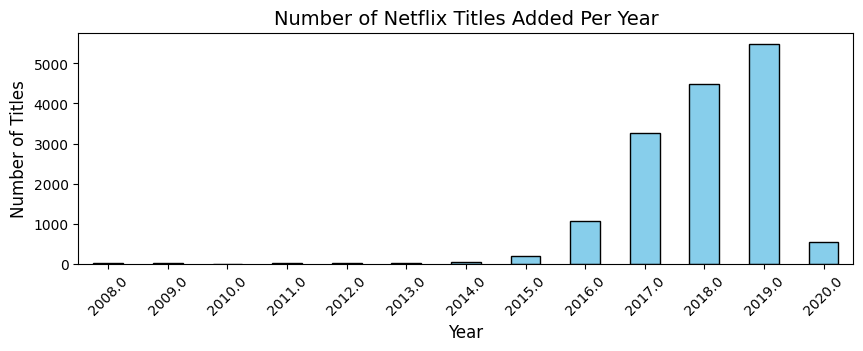

In [ ]:
titles_per_year = df.groupby('year_added').size()

plt.figure(figsize=(10,3))
titles_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Netflix Titles Added Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)
plt.show()

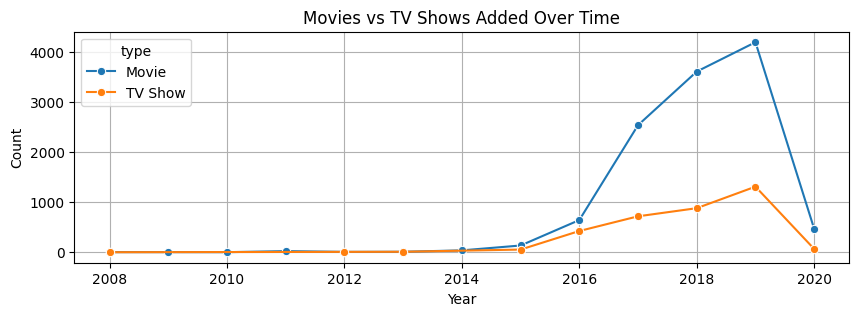

In [ ]:
yearly_type = df.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10,3))
sns.lineplot(data=yearly_type, x='year_added', y='count', hue='type', marker='o')
plt.title('Movies vs TV Shows Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

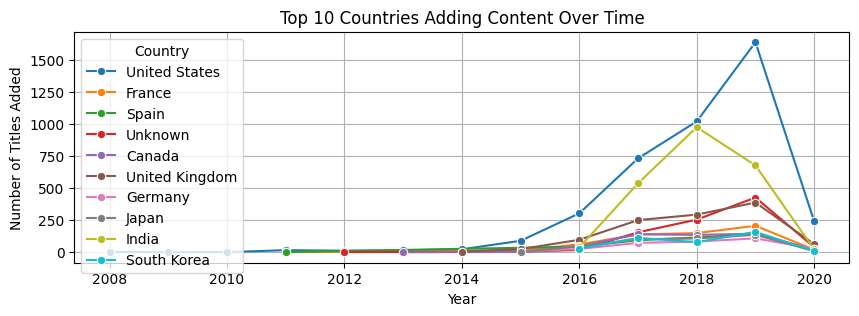

In [ ]:
country_year = df.groupby(['year_added', 'country']).size().reset_index(name='count')

top_countries = df['country'].value_counts().head(10).index
country_year_top = country_year[country_year['country'].isin(top_countries)]

plt.figure(figsize=(10,3))
sns.lineplot(data=country_year_top, x='year_added', y='count', hue='country', marker='o')
plt.title('Top 10 Countries Adding Content Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend(title="Country")
plt.show()


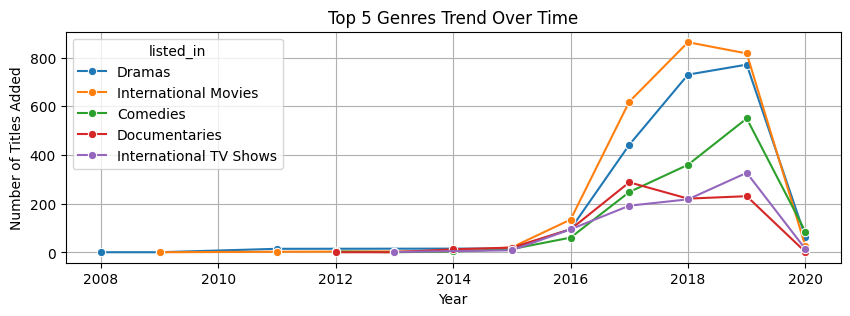

In [ ]:
genre_trend = df.groupby(['year_added', 'listed_in']).size().reset_index(name='count')

top_genres = df['listed_in'].value_counts().head(5).index
genre_trend_top = genre_trend[genre_trend['listed_in'].isin(top_genres)]

plt.figure(figsize=(10,3))
sns.lineplot(data=genre_trend_top, x='year_added', y='count', hue='listed_in', marker='o')
plt.title('Top 5 Genres Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


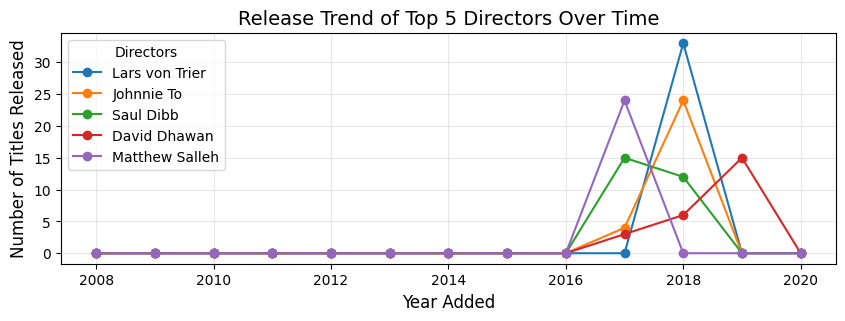

In [ ]:
df_directors = df[df['director'] != "Unknown"]

director_yearly = df_directors.groupby(['year_added', 'director']).size().reset_index(name='count')

director_trend = director_yearly.pivot(index='year_added', columns='director', values='count').fillna(0)

top_directors = df_directors['director'].value_counts().head(5).index
top_director_trend = director_trend[top_directors]

plt.figure(figsize=(10,3))
for director in top_directors:
    plt.plot(top_director_trend.index, top_director_trend[director], marker='o', label=director)

plt.title("Release Trend of Top 5 Directors Over Time", fontsize=14)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles Released", fontsize=12)
plt.legend(title="Directors")
plt.grid(alpha=0.3)
plt.show()

<Figure size 1000x300 with 0 Axes>

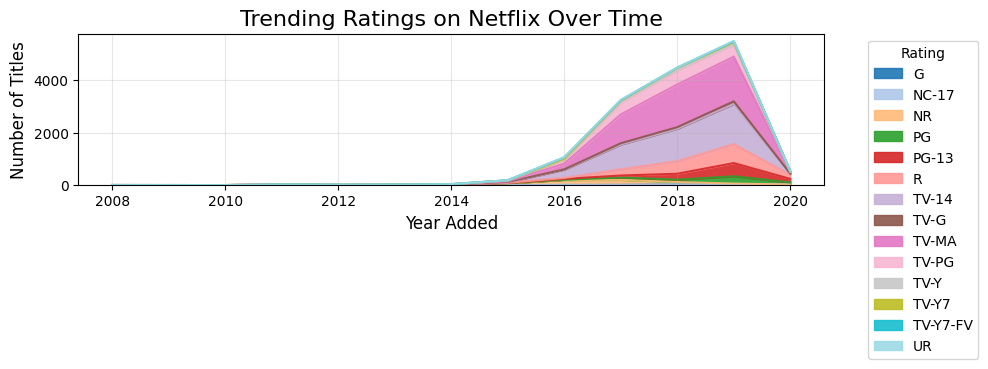

In [ ]:
rating_trend = df.groupby(['year_added', 'rating']).size().reset_index(name='count')

rating_pivot = rating_trend.pivot(index='year_added', columns='rating', values='count').fillna(0)


plt.figure(figsize=(10,3))
rating_pivot.plot(kind='area', stacked=True, colormap='tab20', figsize=(10,3), alpha=0.9)

plt.title("Trending Ratings on Netflix Over Time", fontsize=16)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


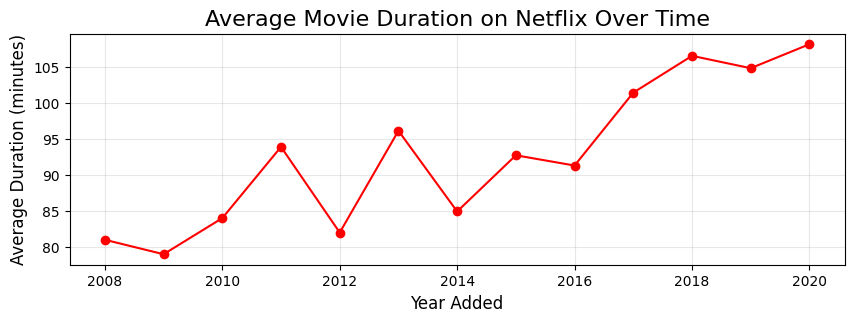

In [ ]:
movies_df = df[df['type'] == 'Movie'].copy()

movies_df['duration_minutes'] = movies_df['duration'].str.replace(' min', '', regex=False).astype(float)

avg_movie_duration = movies_df.groupby('year_added')['duration_minutes'].mean().reset_index()

plt.figure(figsize=(10,3))
plt.plot(avg_movie_duration['year_added'], avg_movie_duration['duration_minutes'], marker='o', color='red')

plt.title("Average Movie Duration on Netflix Over Time", fontsize=16)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Average Duration (minutes)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


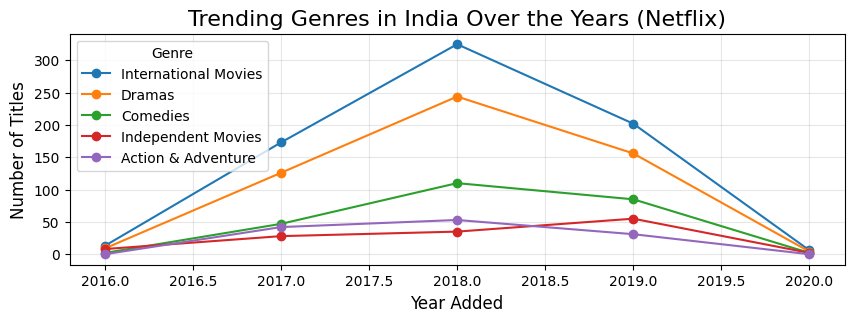

In [ ]:
india_df = df[df['country'] == 'India'].copy()

india_genres = india_df.groupby(['year_added', 'listed_in']).size().reset_index(name='count')

india_pivot = india_genres.pivot(index='year_added', columns='listed_in', values='count').fillna(0)

top_genres = india_pivot.sum().sort_values(ascending=False).head(5).index
india_pivot[top_genres].plot(kind='line', figsize=(10,3), marker='o')

plt.title("Trending Genres in India Over the Years (Netflix)", fontsize=16)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title="Genre", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


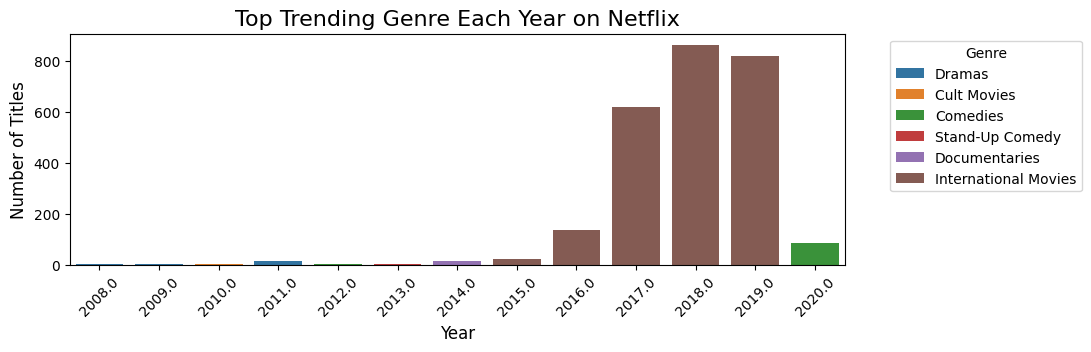

In [ ]:
genre_trends = df.groupby(['year_added', 'listed_in']).size().reset_index(name='count')

top_genre_each_year = genre_trends.loc[genre_trends.groupby('year_added')['count'].idxmax()]

plt.figure(figsize=(10,3))
sns.barplot(data=top_genre_each_year, x="year_added", y="count", hue="listed_in", dodge=False)

plt.title("Top Trending Genre Each Year on Netflix", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


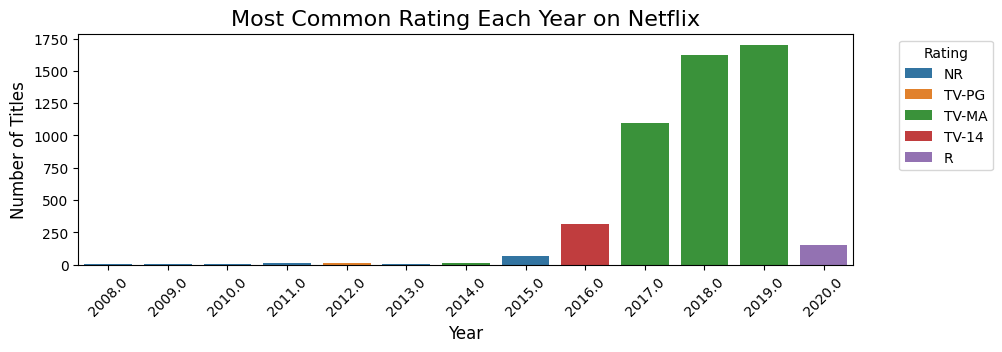

In [ ]:
rating_trends = df.groupby(['year_added', 'rating']).size().reset_index(name='count')
top_rating_each_year = rating_trends.loc[rating_trends.groupby('year_added')['count'].idxmax()]

plt.figure(figsize=(10,3))
sns.barplot(data=top_rating_each_year, x="year_added", y="count", hue="rating", dodge=False)

plt.title("Most Common Rating Each Year on Netflix", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


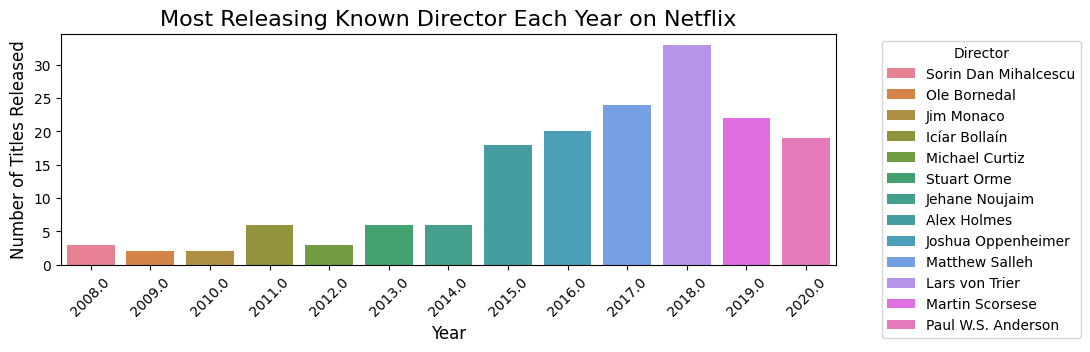

In [ ]:
directors_df = df.dropna(subset=['director'])
directors_df = directors_df[directors_df['director'].str.lower() != 'unknown']

director_trends = directors_df.groupby(['year_added', 'director']).size().reset_index(name='count')

top_director_each_year = director_trends.loc[director_trends.groupby('year_added')['count'].idxmax()]

plt.figure(figsize=(10,3))
sns.barplot(data=top_director_each_year, x="year_added", y="count", hue="director", dodge=False)

plt.title("Most Releasing Known Director Each Year on Netflix", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles Released", fontsize=12)
plt.legend(title="Director", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
